In [2]:
! pip install torch --quiet
! pip install pandas --quiet
! pip install torchvision --quiet

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
from torchvision import transforms
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, random_split

In [4]:
start_time = time.time()

# Using the inbuilt pandas function to read a dataframe from a pkl file
pokemon_df = pd.read_pickle(os.path.join('Data', 'pkl_data', 'pokemon100_1.pkl'))

end_time = time.time()

# Calculate the elapsed time
elapsed_time_seconds = end_time - start_time

elapsed_minutes = int(elapsed_time_seconds // 60)
elapsed_seconds = elapsed_time_seconds % 60

print("Elapsed Time to read the file:", elapsed_minutes, "minutes", "{:.2f}".format(elapsed_seconds), "seconds")


start_time = time.time()

Elapsed Time to read the file: 0 minutes 5.53 seconds


In [5]:
print(len(os.listdir(os.path.join('Data', 'archive', 'dataset'))))

149


There is 149 Pokemon in the dataset

In [6]:
print(len(pokemon_df.columns))
print(pokemon_df.columns)

150
Index(['tensor', 'pokemon_Abra', 'pokemon_Aerodactyl', 'pokemon_Alakazam',
       'pokemon_Arbok', 'pokemon_Arcanine', 'pokemon_Articuno',
       'pokemon_Beedrill', 'pokemon_Bellsprout', 'pokemon_Blastoise',
       ...
       'pokemon_Vileplume', 'pokemon_Voltorb', 'pokemon_Vulpix',
       'pokemon_Wartortle', 'pokemon_Weedle', 'pokemon_Weepinbell',
       'pokemon_Weezing', 'pokemon_Wigglytuff', 'pokemon_Zapdos',
       'pokemon_Zubat'],
      dtype='object', length=150)


In [7]:
print(pokemon_df.head(2))

                                              tensor  pokemon_Abra  \
0  [[[tensor(0.9804), tensor(0.9765), tensor(0.98...          True   
1  [[[tensor(1.), tensor(1.), tensor(1.), tensor(...          True   

   pokemon_Aerodactyl  pokemon_Alakazam  pokemon_Arbok  pokemon_Arcanine  \
0               False             False          False             False   
1               False             False          False             False   

   pokemon_Articuno  pokemon_Beedrill  pokemon_Bellsprout  pokemon_Blastoise  \
0             False             False               False              False   
1             False             False               False              False   

   ...  pokemon_Vileplume  pokemon_Voltorb  pokemon_Vulpix  pokemon_Wartortle  \
0  ...              False            False           False              False   
1  ...              False            False           False              False   

   pokemon_Weedle  pokemon_Weepinbell  pokemon_Weezing  pokemon_Wigglytuff 

In [8]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693 entries, 0 to 10692
Columns: 150 entries, tensor to pokemon_Zubat
dtypes: bool(149), object(1)
memory usage: 1.6+ MB


In [9]:
pokemon_df.describe()

,tensor,pokemon_Abra,pokemon_Aerodactyl,pokemon_Alakazam,pokemon_Arbok,pokemon_Arcanine,pokemon_Articuno,pokemon_Beedrill,pokemon_Bellsprout,pokemon_Blastoise,...,pokemon_Vileplume,pokemon_Voltorb,pokemon_Vulpix,pokemon_Wartortle,pokemon_Weedle,pokemon_Weepinbell,pokemon_Weezing,pokemon_Wigglytuff,pokemon_Zapdos,pokemon_Zubat
count,10693,10693,10693,10693,10693,10693,10693,10693,10693,10693,...,10693,10693,10693,10693,10693,10693,10693,10693,10693,10693
unique,10693,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,"[[[tensor(0.9804), tensor(0.9765), tensor(0.98...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,10651,10596,10644,10630,10632,10637,10640,10638,10631,...,10626,10628,10625,10632,10634,10642,10630,10626,10633,10644


In [10]:
print(len(pokemon_df))

10693


Split the Data

In [11]:
# valid size is from 0-1 based on percentage
# test_size is from 0-1 based on percentage
# don't use function if both are 0
def df_splitter(df, valid_size=0.1, test_size=0.1):
    # Initialize empty lists to store the splits
    train_data_list = []
    val_data_list = []
    test_data_list = []

    # Iterate over each column
    for column in df.columns:
        # Filter out rows with NaN values in the current column
        df_clean_column = df[df[column].notna()]

        # Split the data in each column into train, validation, and test sets
        train_data, temp_data = train_test_split(df_clean_column[column], test_size=valid_size + test_size, random_state=0)
        val_data, test_data = train_test_split(temp_data, test_size=test_size/(valid_size + test_size), random_state=0)
        
        # Append the splits to the respective lists
        train_data_list.append(train_data)
        val_data_list.append(val_data)
        test_data_list.append(test_data)
    

    # Concatenate the lists into dataframes
    df_train = pd.concat(train_data_list, axis=1)
    df_val = pd.concat(val_data_list, axis=1)
    df_test = pd.concat(test_data_list, axis=1)

    return df_train, df_val, df_test

In [12]:
df_train, df_val, df_test = df_splitter(pokemon_df)

In [13]:
print(df_test.iloc[0,0])

tensor([[[0.0078, 0.0000, 0.0000,  ..., 0.9765, 1.0000, 1.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.9961, 0.9961, 1.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.9961, 1.0000, 1.0000],
         ...,
         [0.1176, 0.1255, 0.2314,  ..., 0.9098, 0.9020, 0.8980],
         [0.1059, 0.0941, 0.1608,  ..., 0.9098, 0.9020, 0.8941],
         [0.1137, 0.0824, 0.1137,  ..., 0.9176, 0.8980, 0.8941]],

        [[0.3529, 0.3843, 0.4039,  ..., 0.9529, 1.0000, 1.0000],
         [0.3373, 0.3804, 0.4118,  ..., 0.9961, 1.0000, 1.0000],
         [0.3294, 0.3765, 0.4196,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.5843, 0.6392, 0.7333,  ..., 0.3020, 0.2627, 0.2392],
         [0.5882, 0.6000, 0.6627,  ..., 0.3333, 0.2667, 0.2353],
         [0.5961, 0.5922, 0.6235,  ..., 0.3647, 0.2745, 0.2353]],

        [[0.2510, 0.2588, 0.2745,  ..., 0.3725, 0.4510, 0.4706],
         [0.2353, 0.2588, 0.2824,  ..., 0.4392, 0.4784, 0.4980],
         [0.2275, 0.2588, 0.2902,  ..., 0.4784, 0.5137, 0.

In [14]:
# to_pil = transforms.ToPILImage()
# pil_image = to_pil(df_test.iloc[0,0])
# pil_image.show()

**Convolutional Layer 1 (conv1):**

- **in_channels:** 3 (RGB channels)
- **out_channels:** 16 (number of filters)
- **kernel_size:** 3x3
- **stride:** 1
- **padding:** 1 (to maintain the spatial dimensions)

Output size:
- **Height** = ((input_height + 2 * padding) - kernel_size) / stride + 1 = ((100 + 2 * 1) - 3) / 1 + 1 = 100
- **Width** = ((input_width + 2 * padding) - kernel_size) / stride + 1 = ((100 + 2 * 1) - 3) / 1 + 1 = 100

So, after conv1, the output feature map size is 16x100x100.

In [15]:
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()

#         # Define the convolutional layers
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
#         self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
#         # Define the max pooling layer
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
#         # Define the fully connected layers
#         self.fc1 = nn.Linear(32 * 25 * 25, 128)  # 32 channels after max pooling, image size reduced to 25x25
#         self.fc2 = nn.Linear(128, 149)  # Output layer with 149 classes

#     def forward(self, x):
#     # Forward pass through the network
    
#         # Convolutional layers with ReLU activation and max pooling
#         x = F.relu(self.conv1(x))
#         x = self.pool(x)
#         x = F.relu(self.conv2(x))
#         x = self.pool(x)
        
#         # Flatten the tensor for the fully connected layers
#         x = x.view(-1, 32 * 25 * 25)
        
#         # Fully connected layers with ReLU activation
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
        
#         return x

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
# net = Net().to(device)

In [16]:
output = net(pokemon_df['tensor'][0])
print(len(output.flatten()))
print(type(output.flatten()))
print(output.flatten())
print(torch.argmax(output.flatten()))

149
<class 'torch.Tensor'>
tensor([-0.0489,  0.0737, -0.0381,  0.0245, -0.0230, -0.0941, -0.0380,  0.0136,
         0.0014,  0.0768,  0.0499, -0.0476,  0.0601,  0.0536,  0.0416,  0.0599,
        -0.0119,  0.0310, -0.0888, -0.0268,  0.0384,  0.0544,  0.0096,  0.0418,
         0.0237,  0.0139,  0.0649,  0.0325,  0.0083, -0.0794,  0.0334, -0.0075,
        -0.0045,  0.0343, -0.0671,  0.0508,  0.0472, -0.0314,  0.0604, -0.0004,
         0.0356,  0.0453, -0.0241, -0.0124, -0.0103, -0.0874, -0.0036,  0.0069,
         0.0485,  0.0150, -0.0828, -0.0055, -0.0153, -0.0454, -0.0438, -0.0569,
        -0.0412,  0.0288,  0.0688, -0.0591,  0.0434,  0.0530,  0.0407,  0.0062,
         0.0145, -0.0332, -0.0384, -0.0157, -0.0544, -0.0499,  0.0846, -0.0511,
         0.0558, -0.0937, -0.0701, -0.0221, -0.0715, -0.0787,  0.0512,  0.0138,
         0.0395,  0.0422,  0.0116,  0.0891,  0.0503,  0.0256,  0.0185, -0.0422,
         0.0809, -0.0132, -0.0804, -0.0414, -0.1251,  0.0359,  0.0270, -0.0258,
         0.03

In [18]:
loss = nn.CrossEntropyLoss
a = torch.tensor([2.5, -4, 0.1])
b = torch.tensor([1,0,0])
loss_val = loss(a.unsqueeze(0), torch.argmax(b))
print('dog')
print(loss_val)

dog
CrossEntropyLoss()


c:\Users\dylan\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [20]:
loss = F.cross_entropy
a = torch.tensor([2.5, -4, 0.1])
b = torch.tensor([1,0,0])
loss_val = loss(a, torch.argmax(b))
print('dog')
print(loss_val)

dog
tensor(0.0882)


In [72]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.pokemon_df = dataframe

    def __len__(self):
        return len(self.pokemon_df)
    
    def __getitem__(self, idx):

        # Extract Labels from DF
        # pokemon_labels = [label for label in self.pokemon_df.columns if label.startswith('pokemon_')]
        # pokemon_labels = ['pokemon_Charmander', 'pokemon_Squirtle', 'pokemon_Bulbasaur', 'pokemon_Pikachu']

        pokemon_labels = []
        counter = 0
        for label in self.pokemon_df.columns:
            if counter >= 10:
                break
            if label.startswith('pokemon_'):
                pokemon_labels.append(label)
                counter += 1

        data = self.pokemon_df.loc[idx]['tensor']
        target = self.pokemon_df.iloc[idx]
        target = [target[col] for col in pokemon_labels]
        target = [int(x) for x in target]
        target = torch.tensor(target)
        return data, target

# Assuming pokemon_df is your DataFrame
dataset = CustomDataset(pokemon_df)

In [73]:
def dataset_splitter(dataset, valid_size=0.1, test_size=0.1, batch_size=10):
    dataset_size = len(dataset)
    valid_int = int(valid_size * dataset_size)
    test_int = int(test_size * dataset_size)
    train_int = dataset_size - valid_int - test_int

    # Splitting the dataset into train and test sets
    train_set, test_and_valid_set = random_split(dataset, [train_int, test_int + valid_int])
    valid_set, test_set = random_split(test_and_valid_set, [valid_int, test_int])

    return train_set, valid_set, test_set

In [74]:
batch_size = 20

train_set, valid_set, test_set = dataset_splitter(dataset)

# Creating DataLoader for train and test sets
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [75]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Define the max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(32 * 25 * 25, 128)  # 32 channels after max pooling, image size reduced to 25x25
        self.fc2 = nn.Linear(128, 10)  # Output layer with 149 classes

        # self.fc1 = nn.Linear(3 * 100 * 100, 200)  # input is a 3 channel 10 * 10 image
        # self.fc2 = nn.Linear(200, 149)  # Output layer with 149 classes

    def forward(self, x):
    # Forward pass through the network
    
        # Convolutional layers with ReLU activation and max pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 32 * 25 * 25)
        
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # x = self.fc1(x)
        # x = self.fc2(x)
        return x

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
net = Net().to(device)

In [76]:
num_epochs = 3
loss_hist = []
valid_loss_hist = []
valid_acc_hist = []
counter = 0
learning_rate = 0.01

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss = F.cross_entropy

stop = False

# Outer training loop
for epoch in range(num_epochs):
    iter_counter = 0
    train_batch = iter(train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)

        # print(data[0][0])
        # print(data[1][0])
        # print(data[2][0])
        # print(data.shape)

        # change to train mode
        net.train()

        # zero the parameter gradients
        optimizer.zero_grad()

        # if data.view(train_loader.batch_size, -1).size() != (20, 30000):
        #     print(data.view(train_loader.batch_size, -1).shape)
        #     print(data.shape)
        #     print(data)
        #     stop = True
        #     break

        # forward pass
        output = net(data)  # net(data.view(20, -1))
        
        # print(output[0])
        # print(output[1])
        # print(output[2])
        # print(output.shape)
        # break

        # initialize the loss & sum over time
        loss_val = loss(output, torch.argmax(targets, dim=1))
        
        # Gradient calculation + weight update
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        # Validaion set
        with torch.no_grad():
            net.eval()
            valid_data, valid_targets = next(iter(valid_loader))
            valid_data = valid_data.to(device)
            valid_targets = valid_targets.to(device)

            # valid set forward pass
            output = net(valid_data)

            # valid set loss
            valid_loss = loss(output, torch.argmax(valid_targets, dim=1))
            valid_loss_hist.append(valid_loss.item())

            # Validation accuracy calculation
            _, predicted = torch.max(output, 1)
            # print(predicted)
            _, valid_labels = torch.max(valid_targets, 1)
            correct = (predicted == valid_labels).sum().item()
            total = valid_targets.size(0)
            valid_accuracy = correct / total
            valid_acc_hist.append(valid_accuracy)
                                  
            # Print train/valid loss/accuracy 
            if counter % 50 == 0:
                print(f"Epoch: {epoch}")
                print(f"Loss on test set: {valid_loss.item()}")
                print(f"Accuracy on test set: {valid_accuracy}")
            counter += 1
    
    if stop:
        break

Epoch: 0
Loss on test set: 10.802704811096191
Accuracy on test set: 0.0
Epoch: 0
Loss on test set: 0.5405687093734741
Accuracy on test set: 0.9
Epoch: 0
Loss on test set: 0.6374133229255676
Accuracy on test set: 0.9
Epoch: 0
Loss on test set: 0.5528134703636169
Accuracy on test set: 0.9
Epoch: 0
Loss on test set: 0.08491920679807663
Accuracy on test set: 1.0
Epoch: 0
Loss on test set: 0.5398890376091003
Accuracy on test set: 0.9
Epoch: 0
Loss on test set: 0.3648725152015686
Accuracy on test set: 0.95
Epoch: 0
Loss on test set: 0.3108920454978943
Accuracy on test set: 0.95
Epoch: 0
Loss on test set: 0.6139420866966248
Accuracy on test set: 0.9
Epoch: 1
Loss on test set: 0.5466980934143066
Accuracy on test set: 0.9
Epoch: 1
Loss on test set: 0.7816928625106812
Accuracy on test set: 0.85
Epoch: 1
Loss on test set: 0.3191590905189514
Accuracy on test set: 0.95
Epoch: 1
Loss on test set: 0.5539273619651794
Accuracy on test set: 0.9
Epoch: 1
Loss on test set: 0.0625649243593216
Accuracy on t

In [77]:
net.eval()
batch_size = train_loader.batch_size
print(batch_size)
data, targets = next(iter(train_loader))
print('data.shape:', data.shape)
output = net(data)  # net(data.view(batch_size, -1))
print(output.shape)
print(output[1])
print(output[4])
print(torch.argmax(targets, dim=1))
print(torch.argmax(targets, dim=1))

20
data.shape: torch.Size([20, 3, 100, 100])
torch.Size([20, 10])
tensor([3.4836, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<SelectBackward0>)
tensor([4.7883, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<SelectBackward0>)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


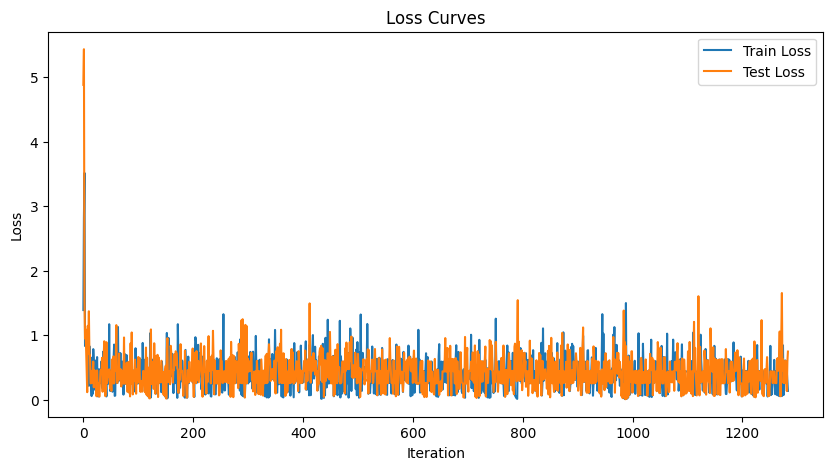

In [61]:
import matplotlib.pyplot as plt
# Plot Loss
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(valid_loss_hist)
plt.title("Loss Curves")
plt.legend(["Train Loss", "Test Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()